In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
# Read the CSV file
df = pd.read_csv('sales.csv')

# Convert 'Sales Revenue' column to numeric
df['Sales Revenue'] = df['Sales Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
df['Advertising Spend'] = df['Advertising Spend'].str.replace(',', '').str.replace('$', '').astype(float)
df.head()

,Year,Quarter,Product Category,Sales Channel,Region,Advertising Spend,Sales Revenue
0,2020,Q1,Clothing,Retail Store,Northeast,10000.0,150000.0
1,2020,Q1,Clothing,Online,Northeast,5000.0,75000.0
2,2020,Q1,Electronics,Retail Store,Northeast,20000.0,200000.0
3,2020,Q1,Electronics,Online,Northeast,15000.0,150000.0
4,2020,Q1,Appliances,Retail Store,Northeast,5000.0,50000.0


In [149]:
# Filter data for Q1 and Q2
q1_data = df[df['Quarter'] == 'Q1']
q2_data = df[df['Quarter'] == 'Q2']

# Group data by Product Category and calculate Q1 and Q2 sales
grouped_q1 = q1_data.groupby('Product Category')['Sales Revenue'].sum()
grouped_q2 = q2_data.groupby('Product Category')['Sales Revenue'].sum()

# Calculate percentage change
percentage_change = ((grouped_q2 - grouped_q1) / grouped_q1) * 100

# Create a new DataFrame with the required columns
result_df = pd.DataFrame({
    'Product Category': grouped_q1.index,
    'Q1 Sales': grouped_q1.values,
    'Q2 Sales': grouped_q2.values,
    'Percentage Change': percentage_change.values
})

# Sort the table based on the percentage change in descending order
# result_df = result_df.sort_values(by='Percentage Change', ascending=False)

# Format the Percentage Change column to display 3 digits after the decimal point and a percentage sign
result_df['Percentage Change'] = result_df['Percentage Change'].apply(lambda x: '{:.3f}%'.format(x))

# Display the result
result_df


,Product Category,Q1 Sales,Q2 Sales,Percentage Change
0,Appliances,165000.0,105000.0,-36.364%
1,Clothing,525000.0,420000.0,-20.000%
2,Electronics,630000.0,460000.0,-26.984%


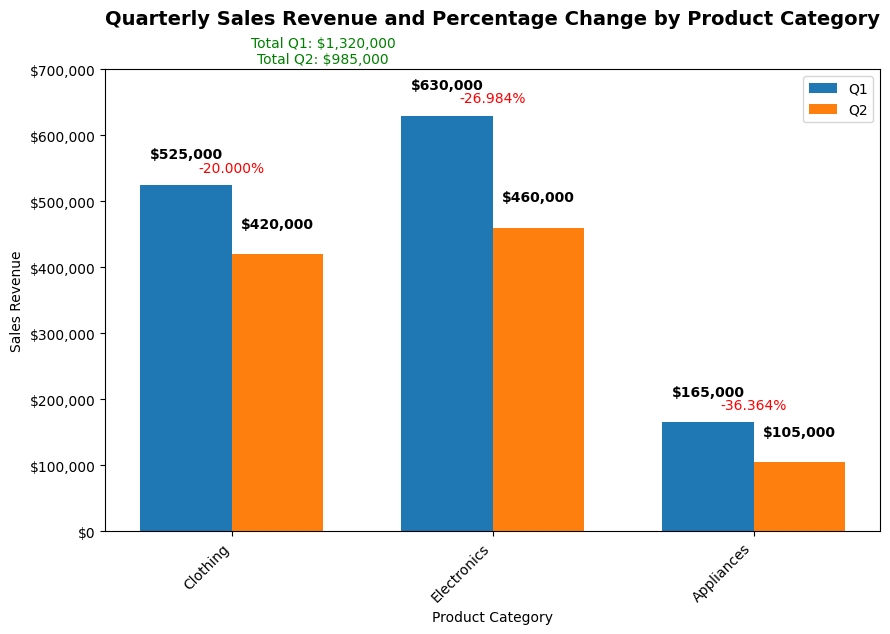

In [150]:
# Assuming 'result_df' is the DataFrame you created
# Sort the DataFrame based on the Percentage Change in ascending order
result_df = result_df.sort_values(by='Percentage Change')

# Convert categories to numerical positions
x_positions = np.arange(len(result_df))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plot bars for Q1
bars_q1 = ax.bar(x_positions, result_df['Q1 Sales'], bar_width, label='Q1')

# Plot bars for Q2 with adjusted positions
bars_q2 = ax.bar(x_positions + bar_width, result_df['Q2 Sales'], bar_width, label='Q2')

# Display percentage change as text on top of the bars in red color
for i, value in enumerate(result_df['Percentage Change']):
    ax.text(x_positions[i] + bar_width/2, max(result_df['Q1 Sales'].iloc[i], result_df['Q2 Sales'].iloc[i]) + 20000,
            f'{value}', ha='center', color='red')

# Display respective values above each bar
for i, (q1_val, q2_val) in enumerate(zip(result_df['Q1 Sales'], result_df['Q2 Sales'])):
    ax.text(x_positions[i], q1_val + 40000, f'${q1_val:,.0f}', ha='center', color='black', fontweight='bold')
    ax.text(x_positions[i] + bar_width, q2_val + 40000, f'${q2_val:,.0f}', ha='center', color='black', fontweight='bold')

# Add labels, title, and legend
ax.set_xlabel('Product Category')
ax.set_ylabel('Sales Revenue')
ax.set_xticks(x_positions + bar_width/2)
ax.set_xticklabels(result_df['Product Category'], rotation=45, ha='right')
ax.legend()

# Format y-axis as currency
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

# Set the y-axis limit to $700,000
ax.set_ylim(0, 700000)

# Display total revenue for each quarter at the top of the chart with spacing at the bottom
ax.text(1.5 * bar_width, max(result_df['Q1 Sales'].max(), result_df['Q2 Sales'].max()) + 80000,
        f'Total Q1: ${result_df["Q1 Sales"].sum():,.0f}\nTotal Q2: ${result_df["Q2 Sales"].sum():,.0f}',
        ha='center', fontsize=10, color='green')

# Display title within the plot
ax.text(0.5, 1.11, 'Quarterly Sales Revenue and Percentage Change by Product Category', ha='center', va='center',
        transform=ax.transAxes, fontsize=14, fontweight='bold')


# Show the plot
plt.show()

